In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix

In [2]:
df_train = pd.read_csv('ann-train.csv', delim_whitespace=True)

In [3]:
df_test = pd.read_csv('ann-test.csv', delim_whitespace=True)

/home/shiva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


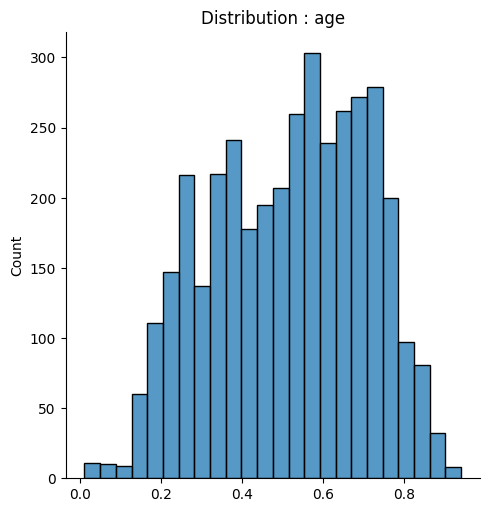

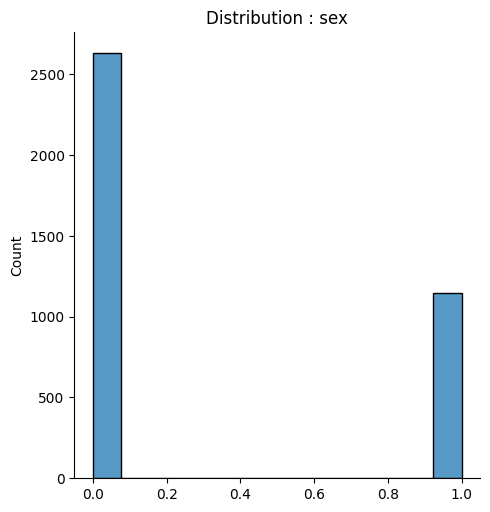

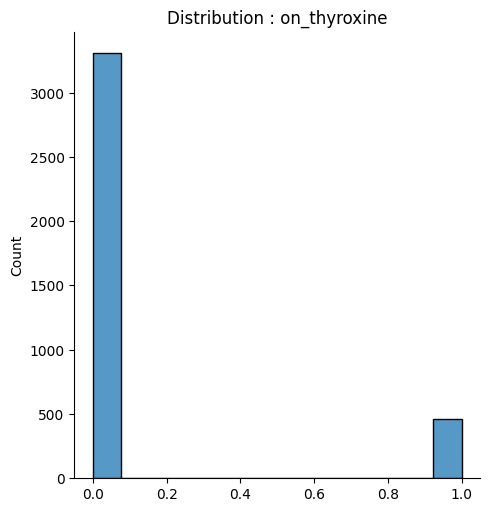

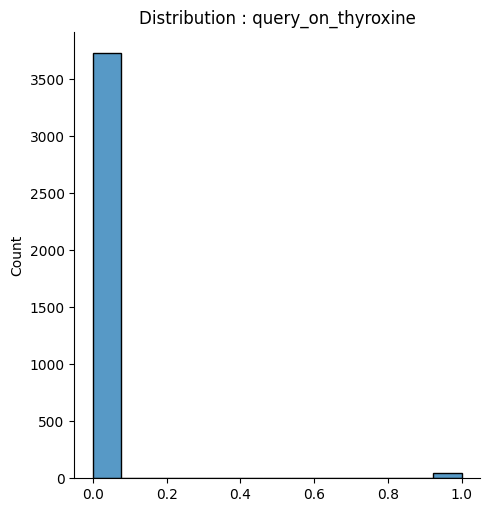

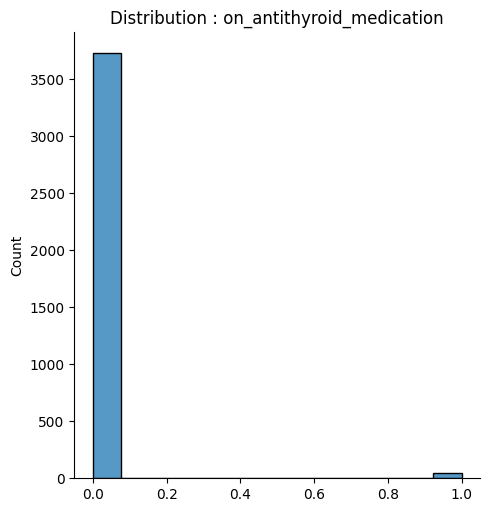

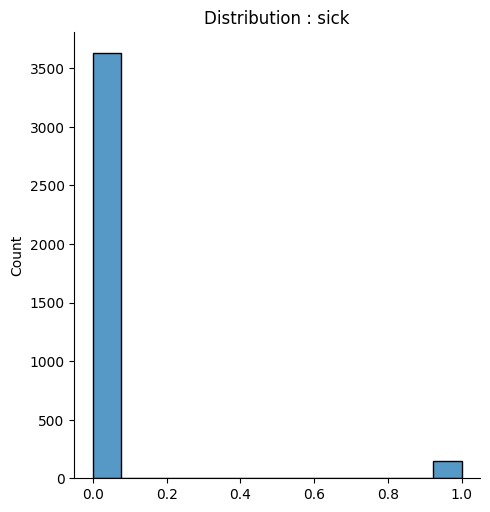

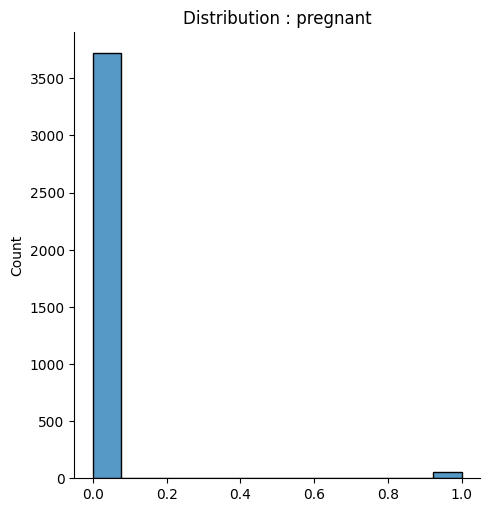

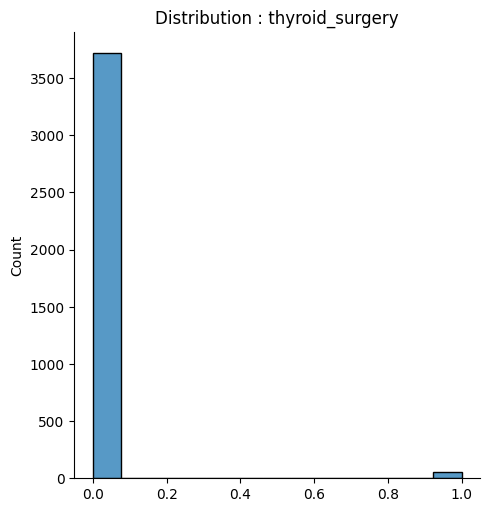

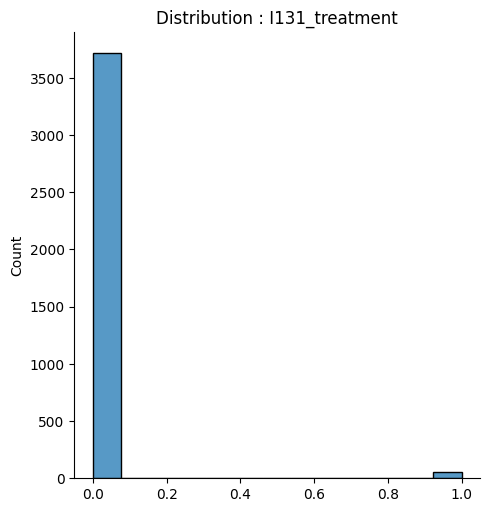

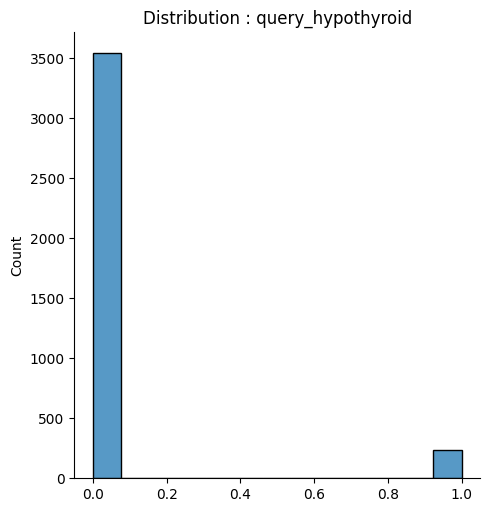

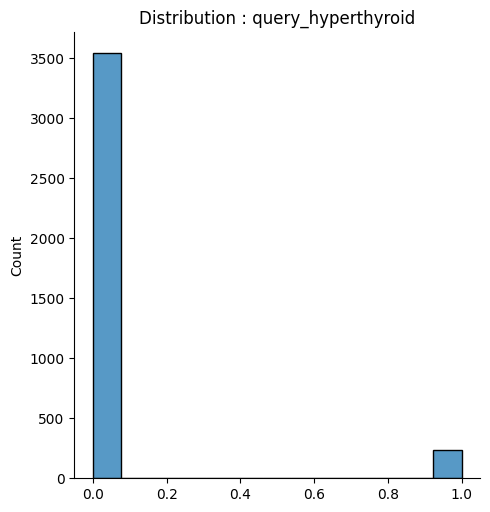

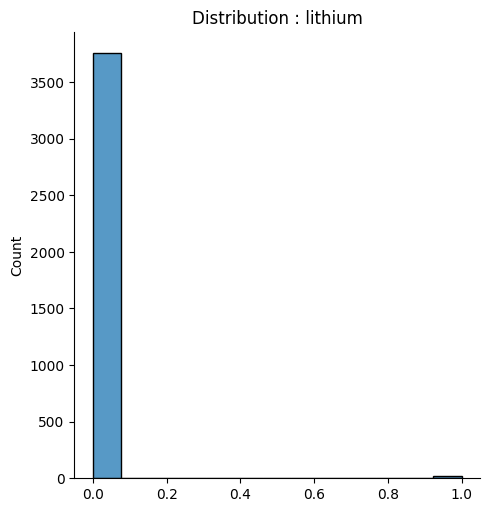

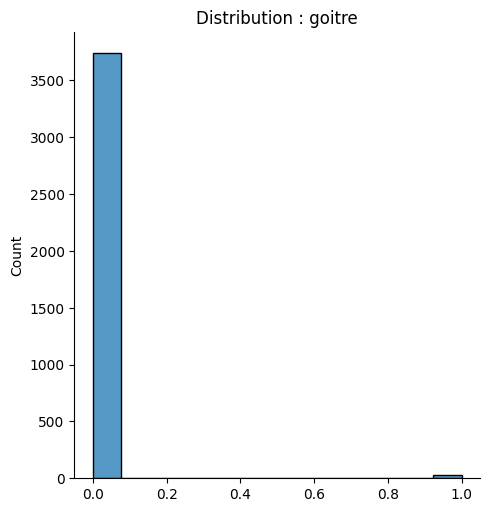

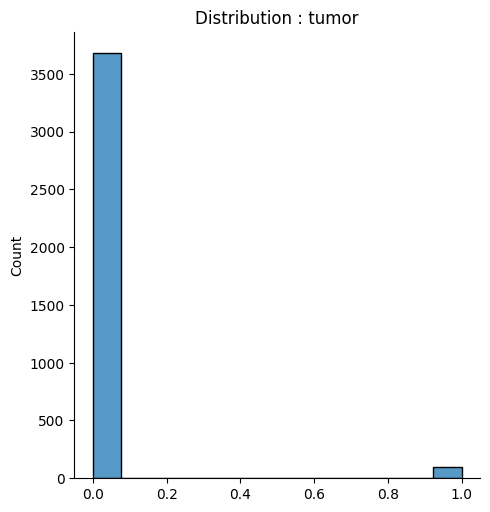

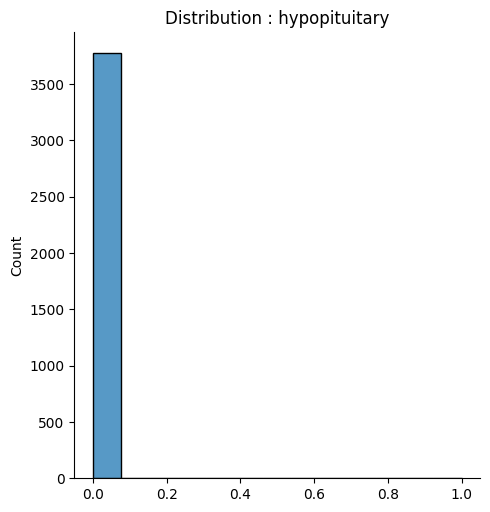

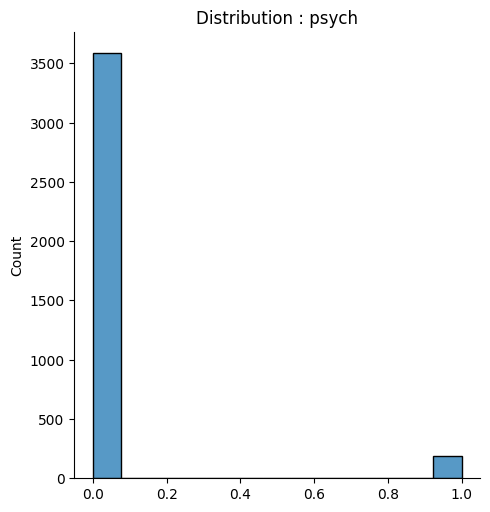

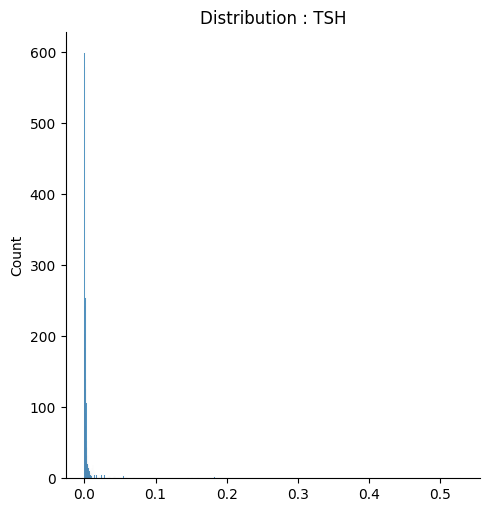

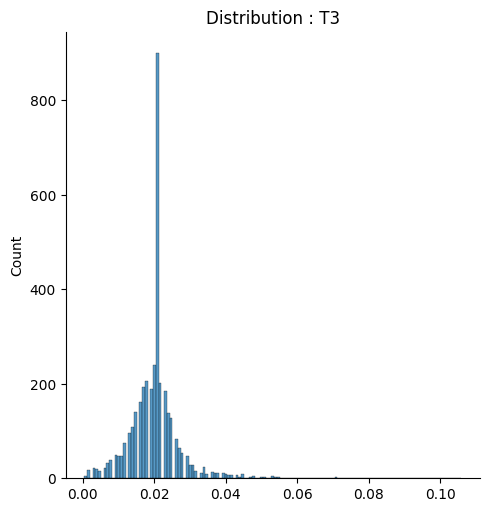

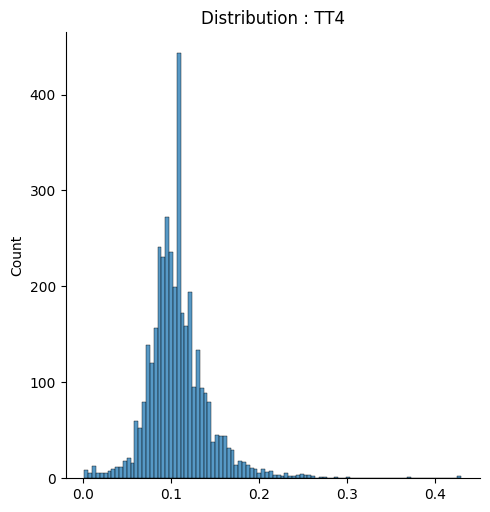

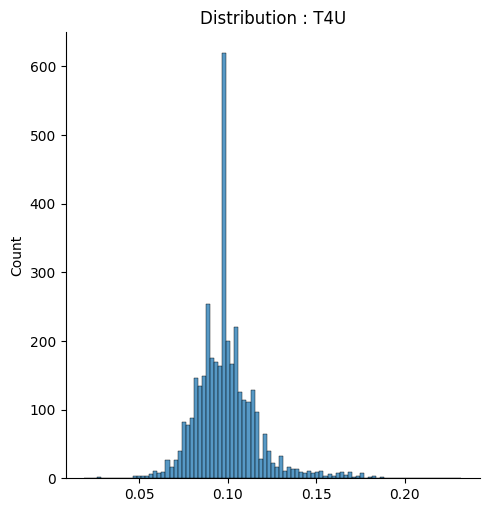

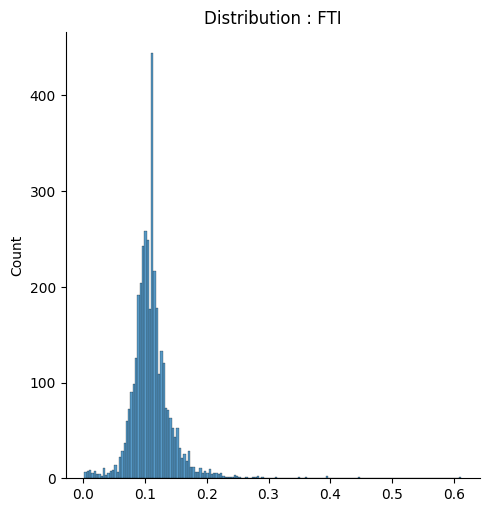

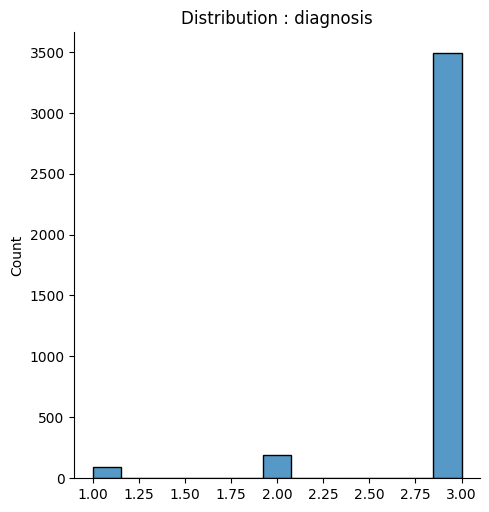

In [4]:
df = df_train
for i in df_train.columns:
    # plt.subplot(3,3,i+1)
    sns.displot(df[i].to_numpy(), kind='hist')
    title = 'Distribution : ' + i
    plt.title(title)
plt.show()

/home/shiva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


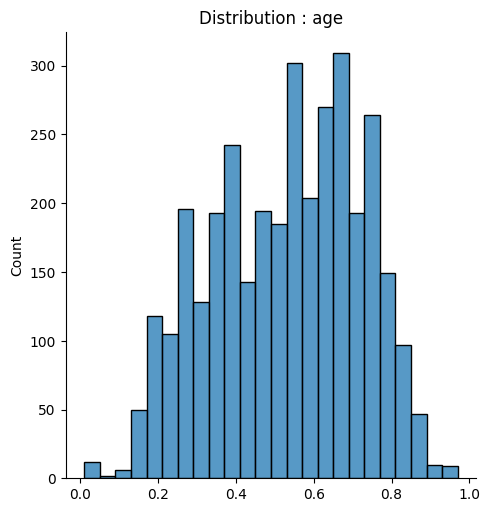

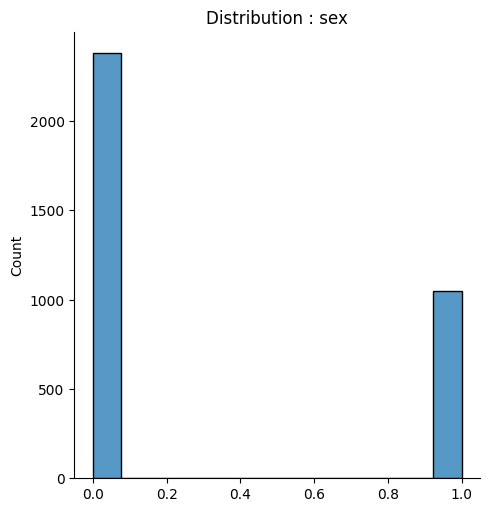

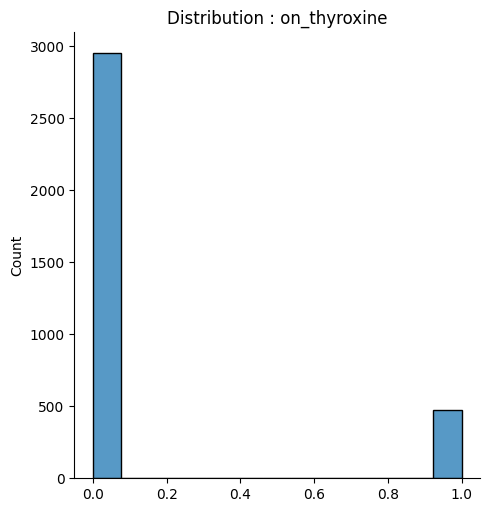

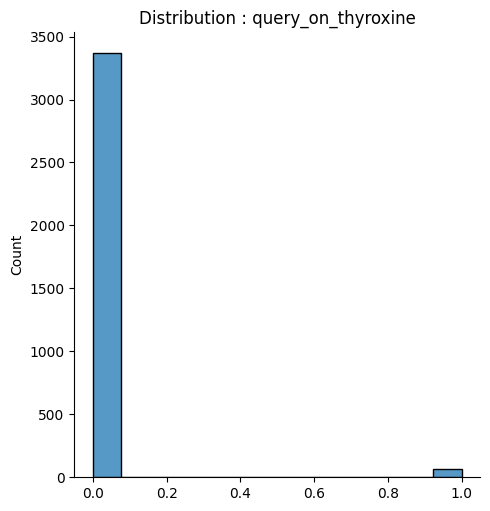

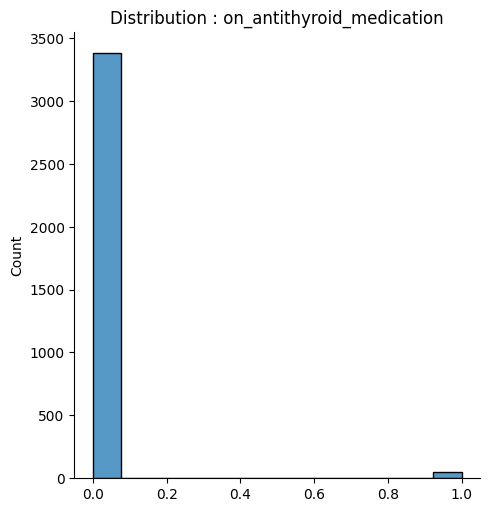

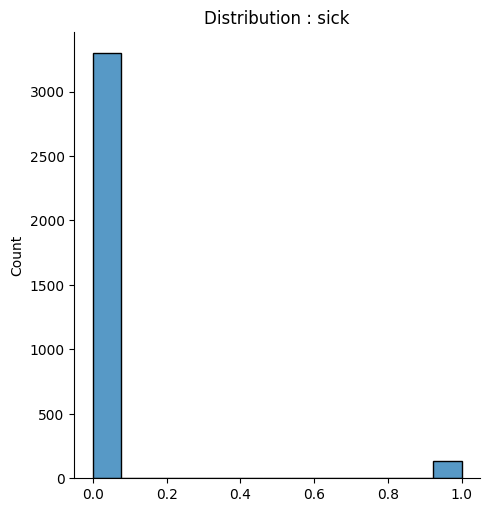

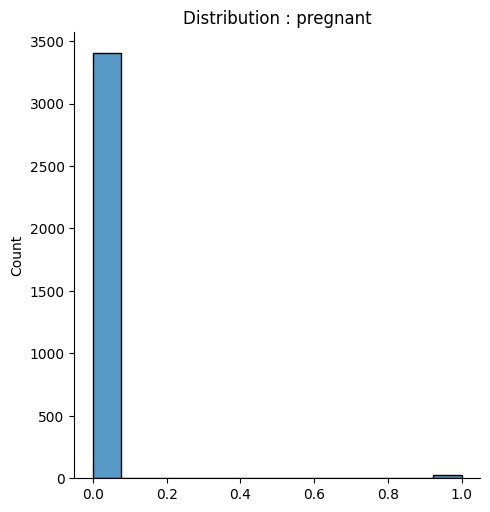

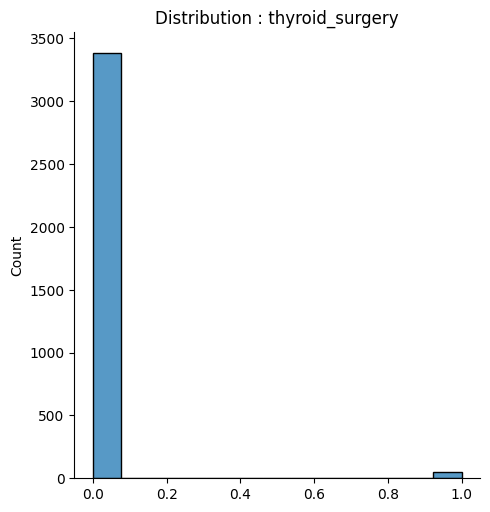

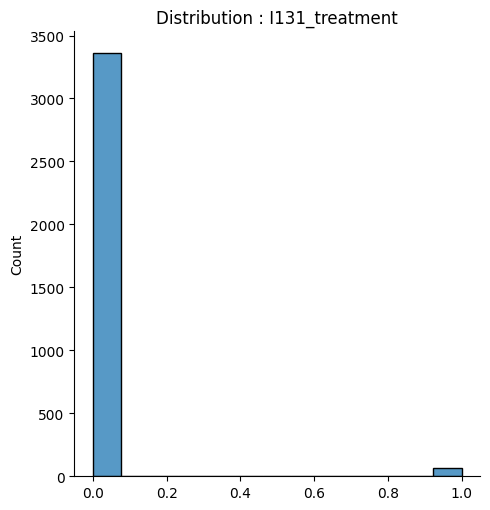

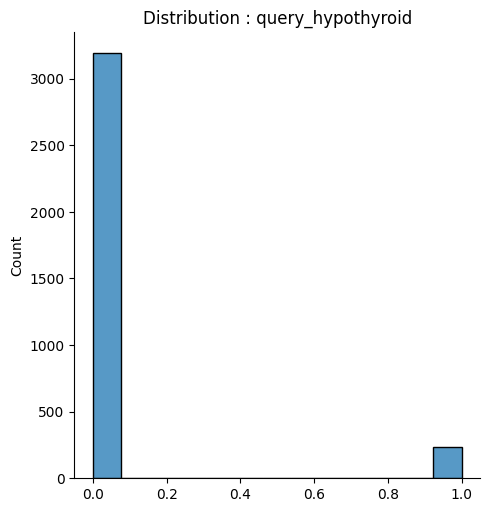

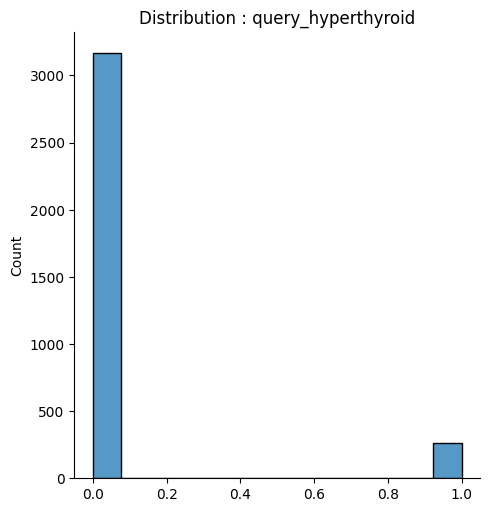

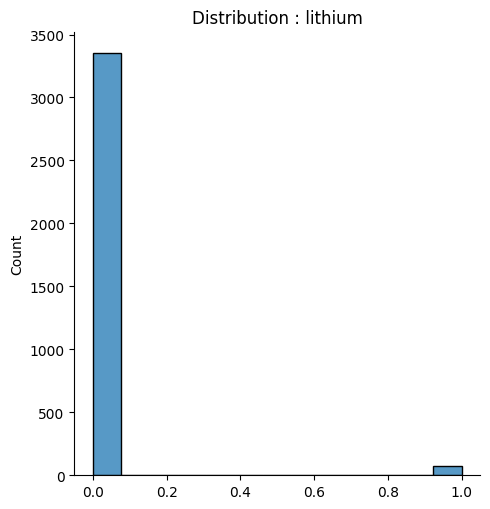

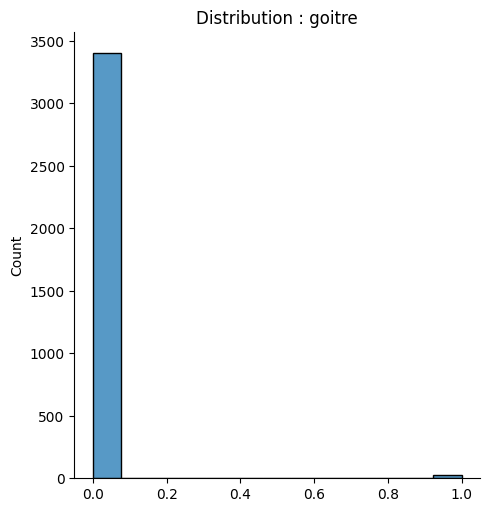

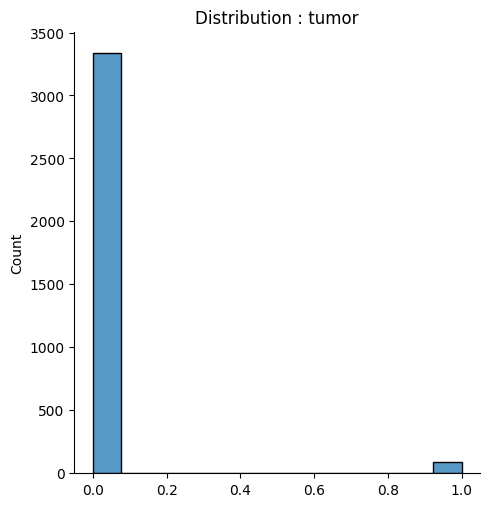

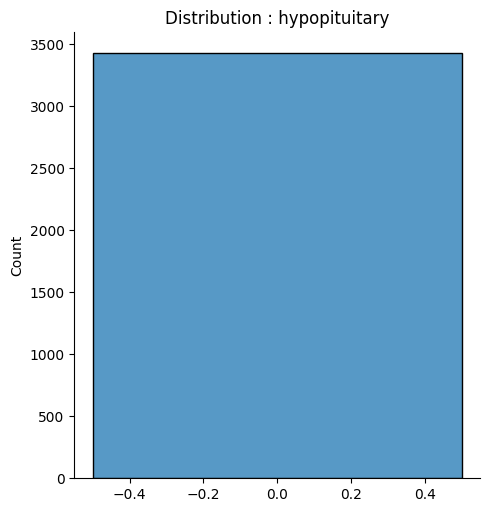

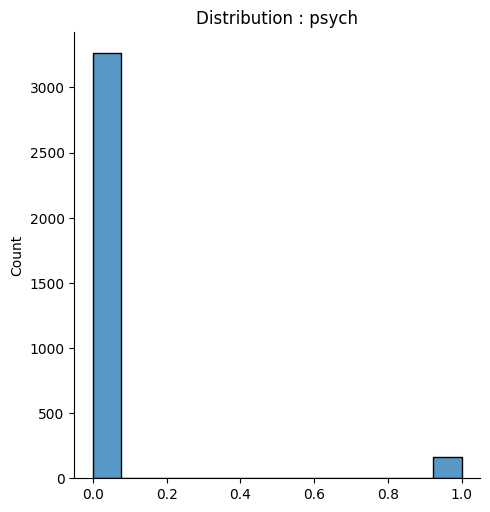

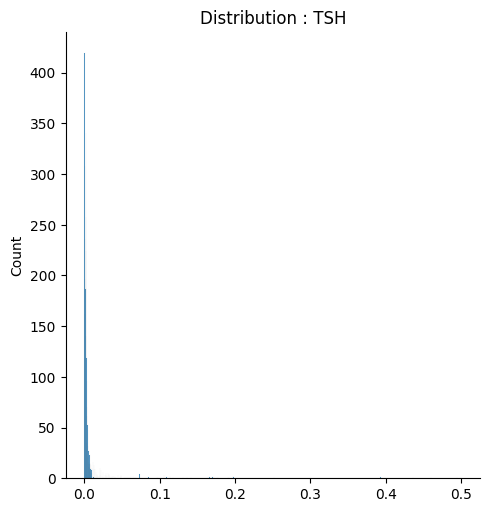

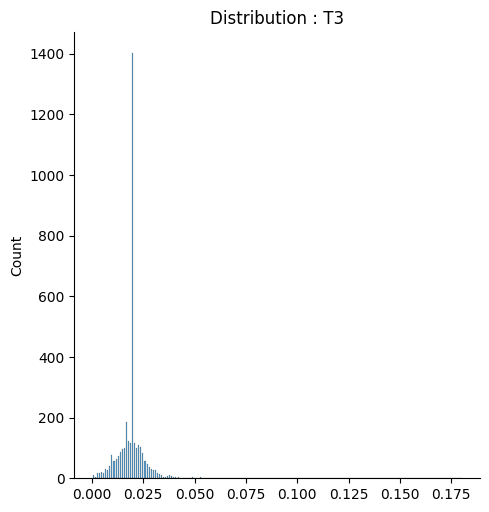

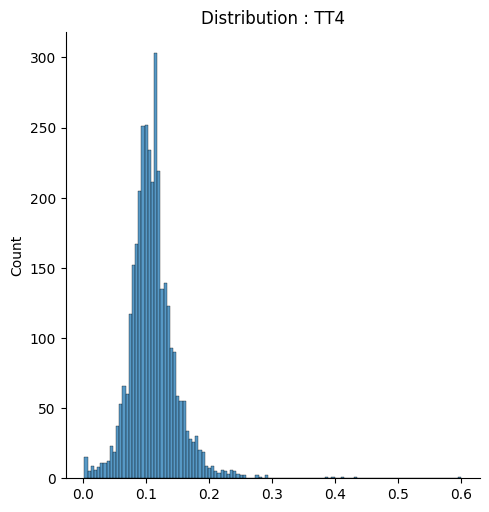

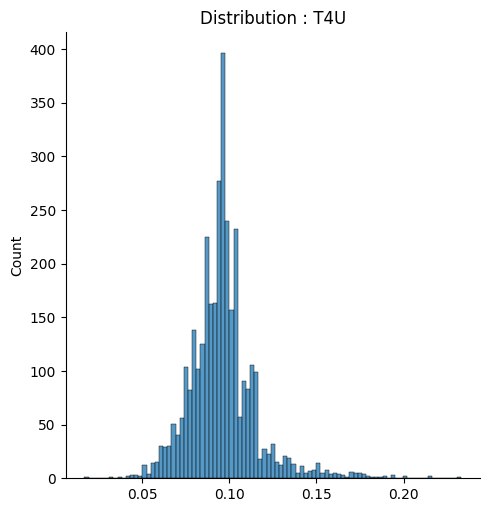

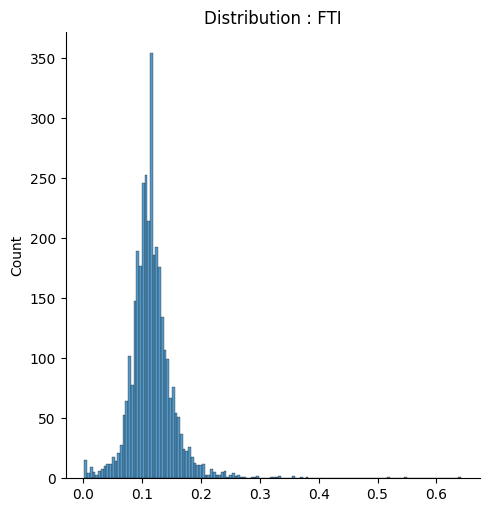

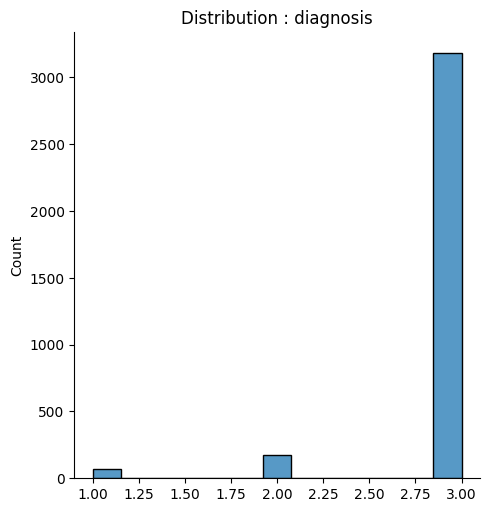

In [5]:
df = df_test
for i in df_train.columns:
    # plt.subplot(3,3,i+1)
    sns.displot(df[i].to_numpy(), kind='hist')
    title = 'Distribution : ' + i
    plt.title(title)
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('diagnosis', axis=1), df_train['diagnosis'], test_size=0.4)

In [56]:
params = {'hidden_layer_sizes': (15), 'random_state': 1, 'max_iter': 10000, 'learning_rate_init': 0.005, 'solver': 'sgd', 'activation': 'relu', 'n_iter_no_change': 500}

In [57]:
clf = MLPClassifier(**params).fit(X_train, y_train)

/home/shiva/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
clf.score(X_train, y_train)

0.9695095006628369

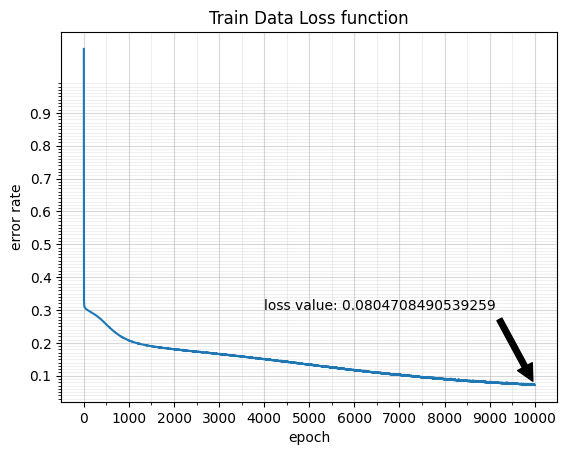

In [59]:
fig = plt.figure()
plt.title('Train Data Loss function')
plt.xlabel('epoch')
plt.ylabel('error rate')
ax = fig.gca()

x_major_ticks = np.arange(0, params['max_iter'] + 1, 1000)
x_minor_ticks = np.arange(0, params['max_iter'] + 1, 500)

y_major_ticks = np.arange(0, 1, 0.1)
y_minor_ticks = np.arange(0, 1, 0.01)

ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.annotate('loss value: 0.0804708490539259', xy=(10000, clf.loss_), xytext=(4000, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(clf.loss_curve_)

In [60]:
clf.loss_

0.07220681313856209

In [61]:
rf_pred = clf.predict(X_train)

target_names = ['hyper_cond', 'hypo_cond', 'healthy']
res1 = classification_report(y_train, rf_pred, target_names=target_names, output_dict=True)
pd.DataFrame(res1)

,hyper_cond,hypo_cond,healthy,accuracy,macro avg,weighted avg
precision,0.955556,0.914286,0.971601,0.96951,0.947148,0.968175
recall,0.843137,0.528926,0.998087,0.96951,0.790050,0.969510
f1-score,0.895833,0.670157,0.984666,0.96951,0.850219,0.965848
support,51.000000,121.000000,2091.000000,0.96951,2263.000000,2263.000000


In [64]:
res = []
for l in [0,1,2]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_train)==l,
                                                      np.array(rf_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,index=target_names, columns = ['class','sensitivity','specificity'])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [62]:
confusion_matrix(y_train, rf_pred)

array([[  43,    4,    4],
       [   0,   64,   57],
       [   2,    2, 2087]])

In [15]:
clf = MLPClassifier(**params).fit(df_test.drop('diagnosis', axis=1), df_test['diagnosis'])

/home/shiva/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
clf.score(df_test.drop('diagnosis', axis=1), df_test['diagnosis'])

0.971120186697783

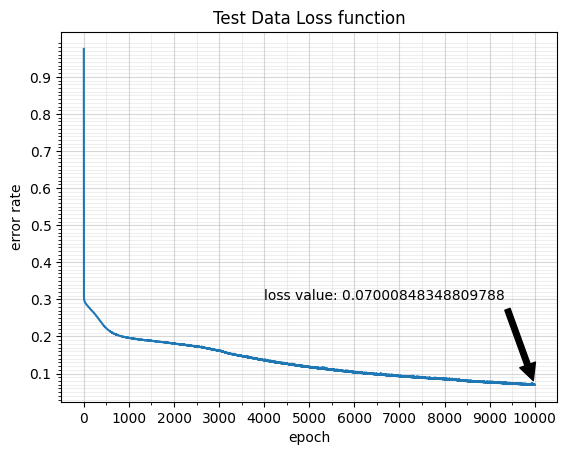

In [44]:
fig = plt.figure()
plt.title('Test Data Loss function')
plt.xlabel('epoch')
plt.ylabel('error rate')
ax = fig.gca()

x_major_ticks = np.arange(0, params['max_iter'] + 1, 1000)
x_minor_ticks = np.arange(0, params['max_iter'] + 1, 500)

y_major_ticks = np.arange(0, 1, 0.1)
y_minor_ticks = np.arange(0, 1, 0.01)

ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.annotate('loss value: '+str(clf.loss_), xy=(10000, clf.loss_), xytext=(4000, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(clf.loss_curve_)

In [18]:
clf.loss_

0.07000848348809788

In [19]:
rf_pred = clf.predict(df_test.drop('diagnosis', axis=1))

target_names = ['hyper_cond', 'hypo_cond', 'healthy']
res1 = classification_report(df_test['diagnosis'], rf_pred, target_names=target_names, output_dict=True)
pd.DataFrame(res1)

,hyper_cond,hypo_cond,healthy,accuracy,macro avg,weighted avg
precision,0.885714,0.927928,0.974438,0.97112,0.929360,0.970147
recall,0.849315,0.581921,0.995595,0.97112,0.808944,0.971120
f1-score,0.867133,0.715278,0.984903,0.97112,0.855771,0.968473
support,73.000000,177.000000,3178.000000,0.97112,3428.000000,3428.000000


In [63]:
res = []
for l in [0,1,2]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(df_test['diagnosis'])==l,
                                                      np.array(rf_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
pd.DataFrame(res,index=target_names, columns = ['class','sensitivity','specificity'])

ValueError: Found input variables with inconsistent numbers of samples: [3428, 2263]

In [20]:
confusion_matrix(df_test['diagnosis'], rf_pred)

array([[  62,    2,    9],
       [   0,  103,   74],
       [   8,    6, 3164]])